Important libraries

In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

Data Preprocessing


Training Image preprocessing


In [2]:
import os

if not os.path.exists('train'):
    print("Error: 'train' directory not found. Creating an empty 'train' directory.")
    os.makedirs('train')

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Building Model

In [4]:
cnn = tf.keras.models.Sequential()


In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\nabin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [11]:
cnn.add(tf.keras.layers.Flatten())


In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling and Training Phase

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=6)


Epoch 1/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1986s 904ms/step - accuracy: 0.8000 - loss: 0.6429 - val_accuracy: 0.8882 - val_loss: 0.3543
Epoch 2/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1566s 713ms/step - accuracy: 0.8942 - loss: 0.3303 - val_accuracy: 0.9296 - val_loss: 0.2135
Epoch 3/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1689s 769ms/step - accuracy: 0.9329 - loss: 0.2055 - val_accuracy: 0.9277 - val_loss: 0.2445
Epoch 4/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2438s 1s/step - accuracy: 0.9490 - loss: 0.1540 - val_accuracy: 0.9427 - val_loss: 0.1819
Epoch 5/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2403s 1s/step - accuracy: 0.9606 - loss: 0.1183 - val_accuracy: 0.9484 - val_loss: 0.1693
Epoch 6/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1546s 704ms/step - accuracy: 0.9700 - loss: 0.0935 - val_accuracy: 0.9594 - val_loss: 0.1302


Evaluating Model

In [21]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 399s 182ms/step - accuracy: 0.9825 - loss: 0.0531
Training accuracy: 0.9842662811279297


In [22]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 90s 164ms/step - accuracy: 0.9616 - loss: 0.1246
Validation accuracy: 0.9593671560287476


Saving Model


In [23]:
cnn.save('trained_plant_disease_model.keras')


In [24]:
training_history.history #Return Dictionary of history


{'accuracy': [0.8326480984687805,
  0.9041894674301147,
  0.9365957975387573,
  0.9521872401237488,
  0.9622306227684021,
  0.9706380367279053],
 'loss': [0.5346869230270386,
  0.29730501770973206,
  0.19419091939926147,
  0.14624616503715515,
  0.1134582981467247,
  0.08983994275331497],
 'val_accuracy': [0.8882312774658203,
  0.9296039342880249,
  0.9276690483093262,
  0.9426929354667664,
  0.9483838081359863,
  0.9593671560287476],
 'val_loss': [0.3543035387992859,
  0.21352560818195343,
  0.2444760501384735,
  0.18194721639156342,
  0.1693265736103058,
  0.13018764555454254]}

In [25]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization


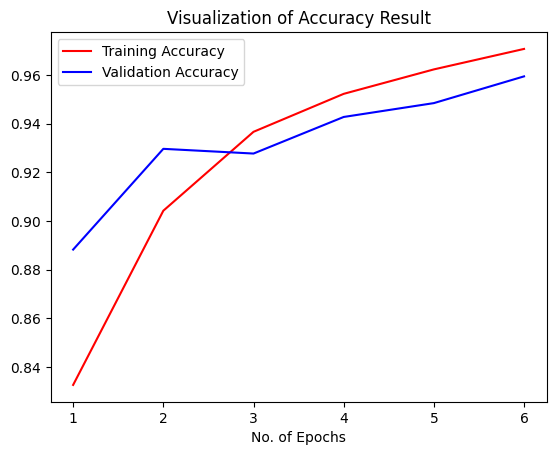

In [28]:
epochs = [i for i in range(1,7)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation


In [29]:
class_name = validation_set.class_names


In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 287s 16ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.94      0.97      0.95       502
                               Blueberry___healthy       0.99      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.97      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.95      0.93       410
                       Corn_(maize)___Common_rust_       0.97      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

Confusion Matrix Visualization


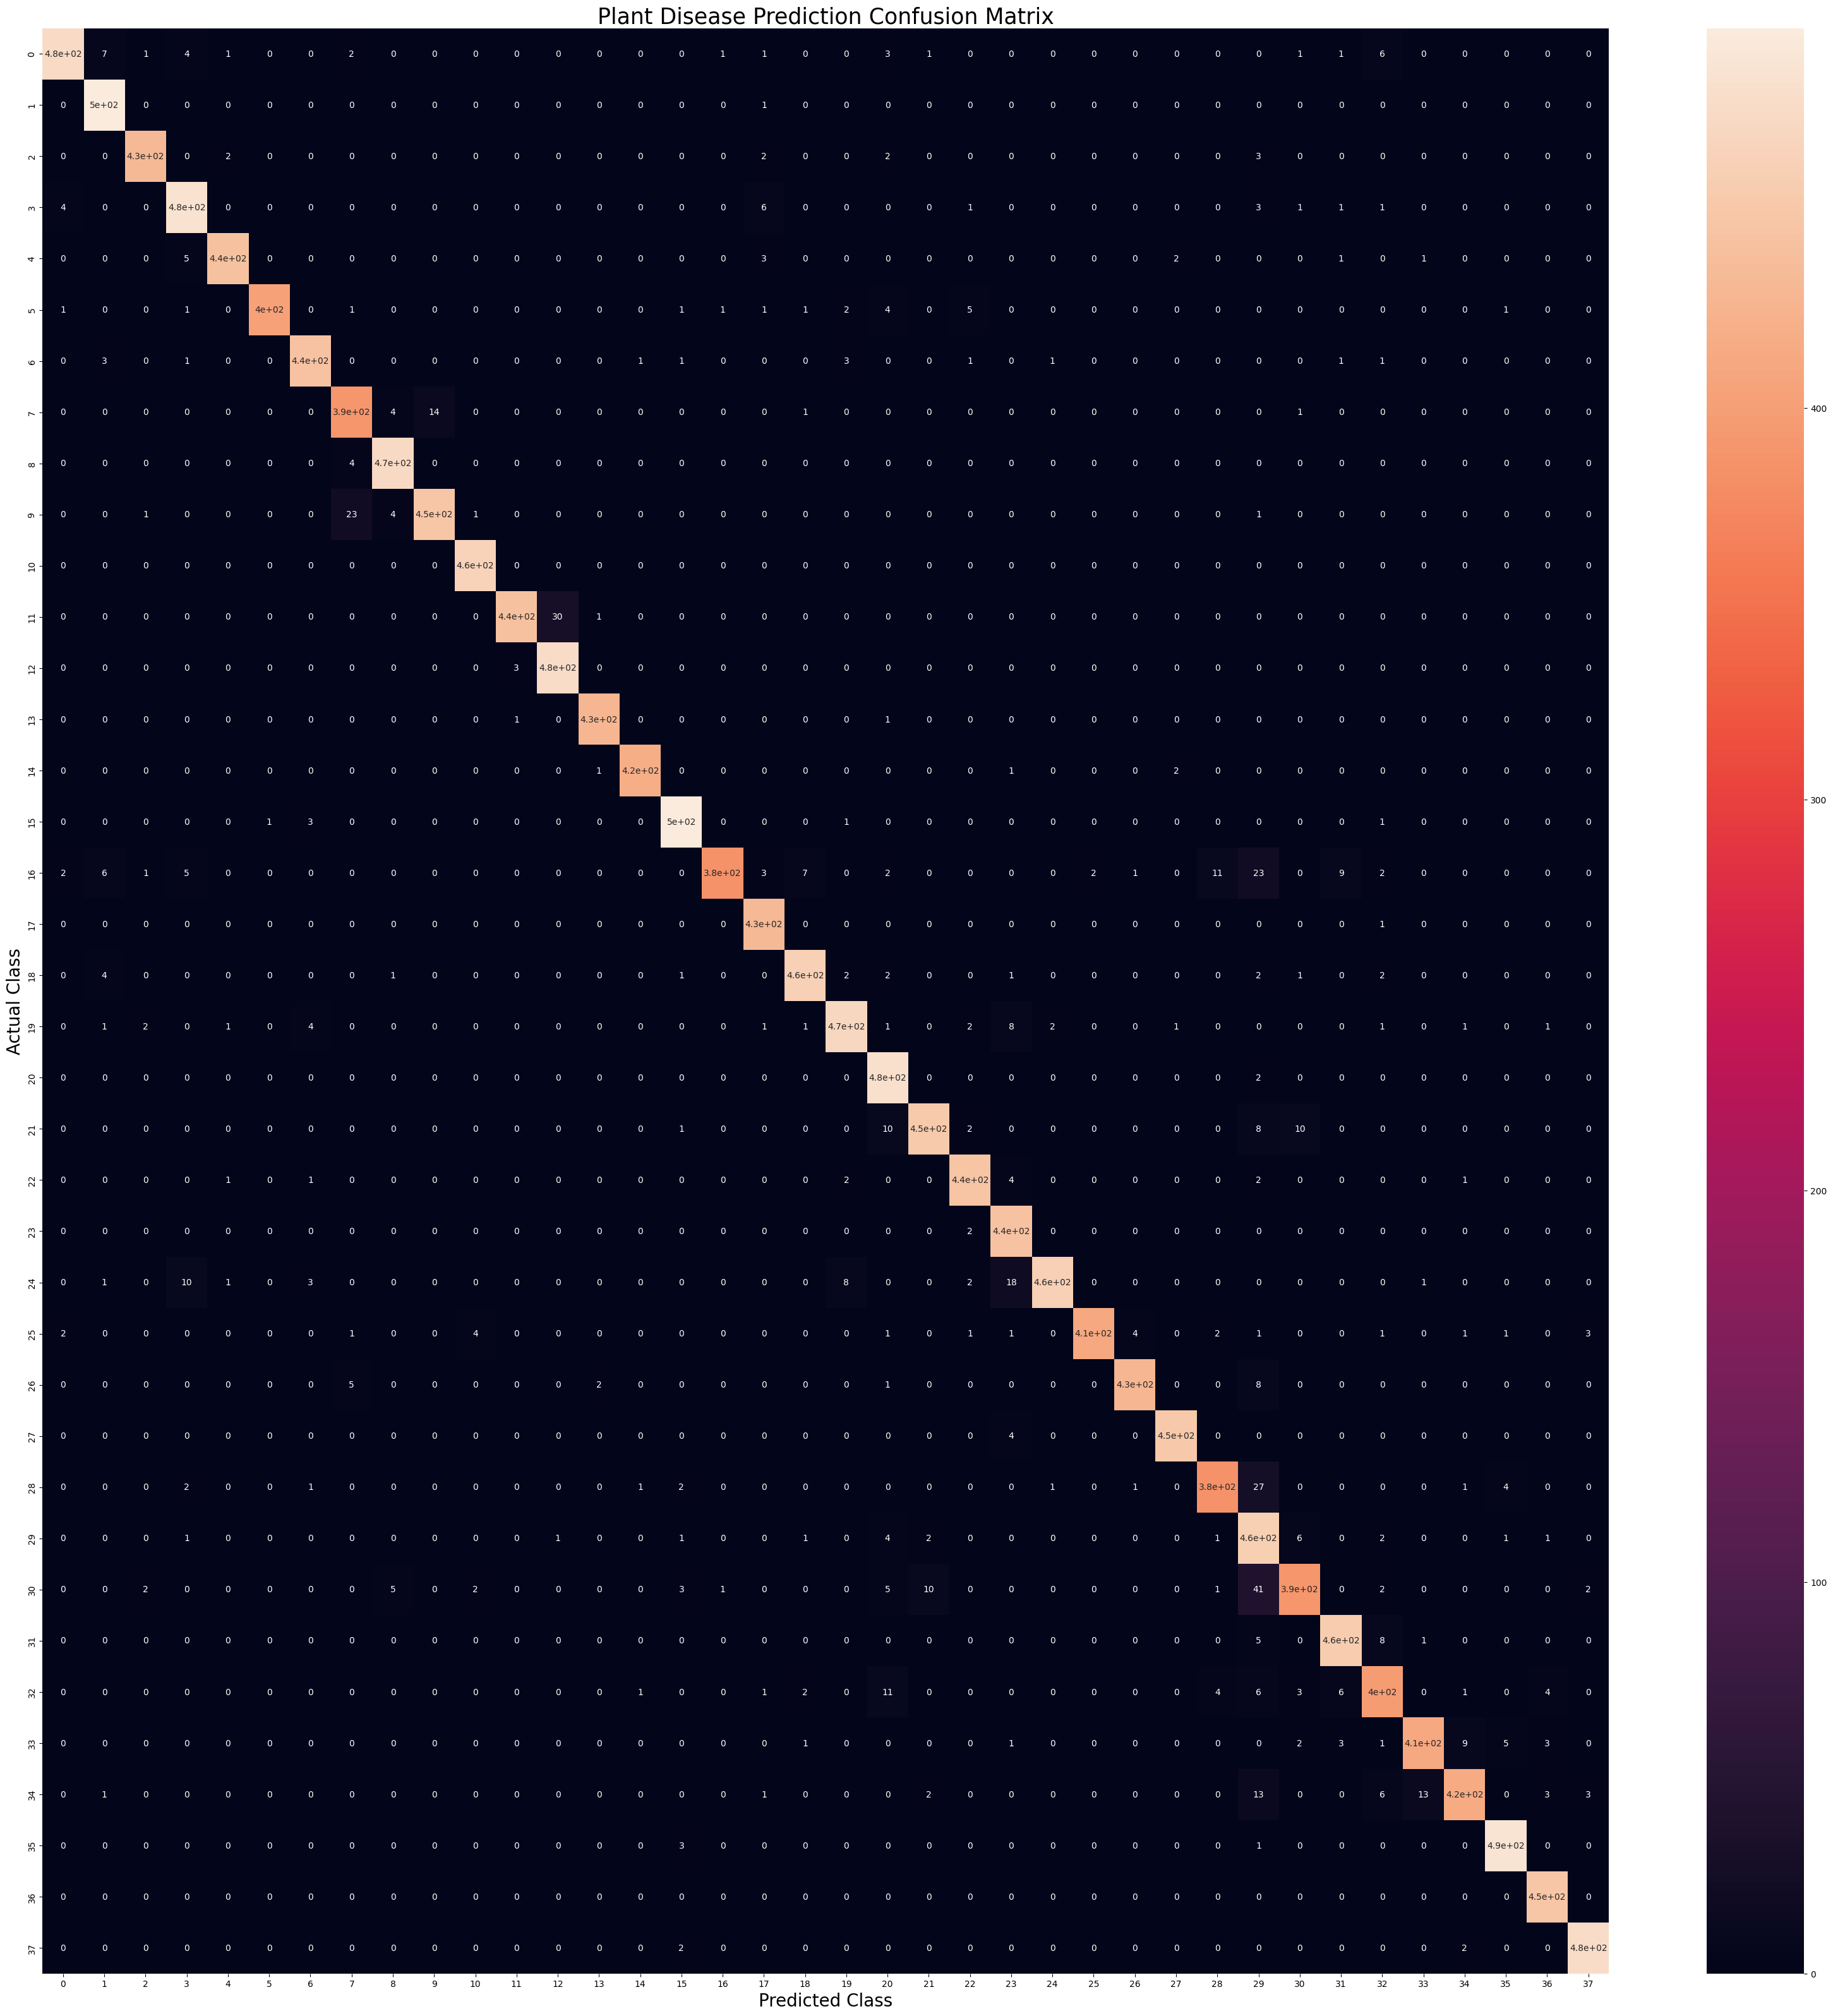

In [37]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()